<h1>
  <center><strong>Titanic EDA & Feature Engineering</strong></center>
</h1>

---
<br>

The Titanic dataset can be found in [Kaggle](https://www.kaggle.com/competitions/titanic/data) or [Seaborn](https://seaborn.pydata.org/generated/seaborn.load_dataset.html).

*   PassengerId is the unique id of the row and it doesn't have any effect on target
*   Survived is the target variable we are trying to predict (0 or 1):
   -   1 = Survived
   -   0 = Not Survived
*   Pclass (Passenger Class) is the socio-economic status of the passenger and it is a categorical ordinal feature which has 3 unique values (1, 2 or 3):
   -   1 = Upper Class
   -   2 = Middle Class
   -   3 = Lower Class
*   Name, Sex and Age are self-explanatory
*   SibSp is the total number of the passengers' siblings and spouse
*   Parch is the total number of the passengers' parents and children
*   Ticket is the ticket number of the passenger
*   Fare is the passenger fare
*   Cabin is the cabin number of the passenger
*   Embarked is port of embarkation and it is a categorical feature which has 3 unique values (C, Q or S):
   -   C = Cherbourg
   -   Q = Queenstown
   -   S = Southampton

<br>
<h2>
  This Notebook Cover This Questions:
</h2>

1.   [How Many People Survived?](#question1)
2.   [Gender Based Survival](#question2)
3.   [Pairplot of Dataset](#question3)
4.   [Embarked vs ...](#question4)
5.   [Survived vs ...](#question5)
6.   [Correlation Matrix](#question6)
7.   [Age Distribution](#question7)
8.   [Outlier](#question8)
9.   [Feature Engineering - Title](#question9)
10.  [Feature Engineering - Life Stages](#question10)


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## **A First Look at the Data**

In [2]:
df = pd.read_csv("/kaggle/input/titanic/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
print(f'Shape     : {df.shape}\n'
      f'Size      : {df.size}\n' 
      f'Dimension : {df.ndim}')

Shape     : (891, 12)
Size      : 10692
Dimension : 2


In [6]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
408,409,0,3,"Birkeland, Mr. Hans Martin Monsen",male,21.0,0,0,312992,7.7750,NaN,S
73,74,0,3,"Chronopoulos, Mr. Apostolos",male,26.0,1,0,2680,14.4542,NaN,C
133,134,1,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,228414,26.0000,NaN,S
649,650,1,3,"Stanley, Miss. Amy Zillah Elsie",female,23.0,0,0,CA. 2314,7.5500,NaN,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S


In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


<a name='question1'></a>
## **1. How Many People Survived?**

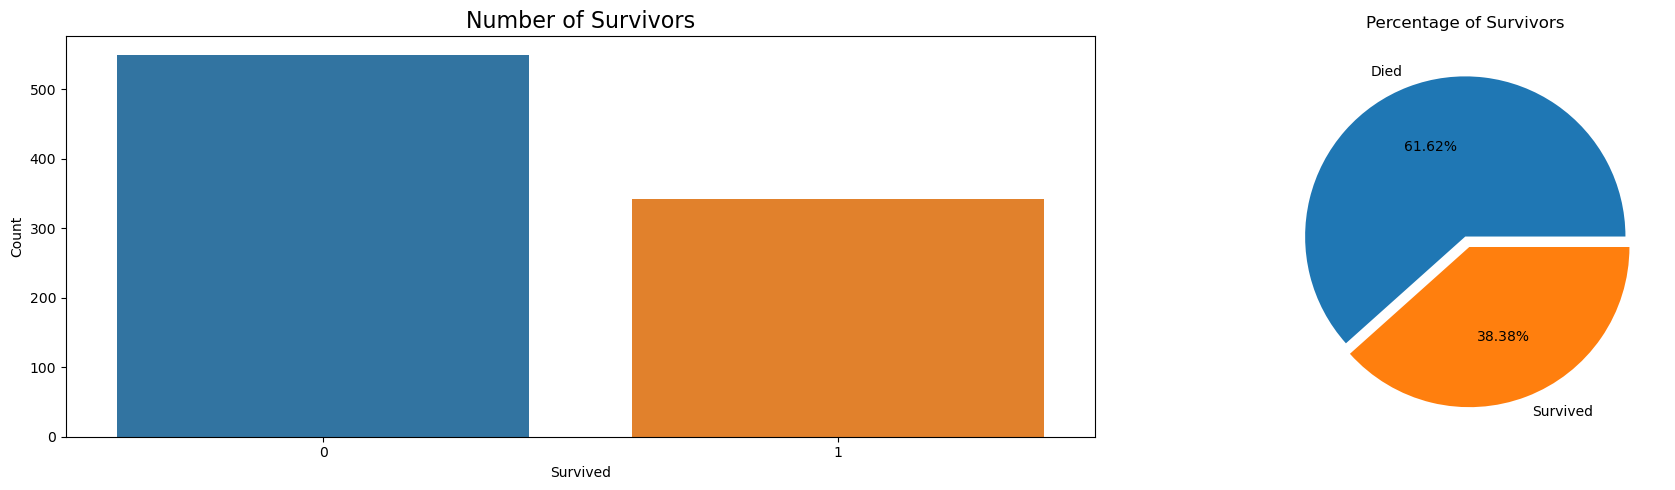

In [11]:
fig, axs = plt.subplots(1,2, figsize = (20, 5))

ax = sns.countplot(x= 'Survived', data = df,ax= axs[0]);
ax.set_xlabel("Survived")
ax.set_ylabel("Count")
axs[0].set_title("Number of Survivors", fontsize=16)


ax2 = df.groupby('Survived')['PassengerId'].count().plot.pie(explode=[0,0.07], 
                                                             autopct='%.2f%%', 
                                                             ylabel='',
                                                             labels=['Died', 'Survived'])
axs[1].set_title("Percentage of Survivors")

plt.tight_layout()
plt.show()

<a name='question2'></a>
## **2. Gender Based Survival**

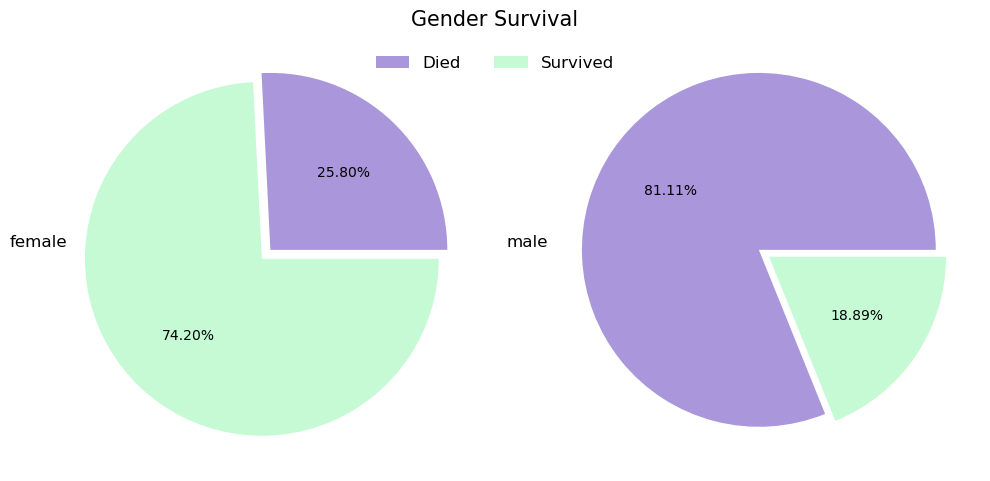

In [12]:
from matplotlib.patches import Patch

ct=pd.crosstab(df['Survived'], df['Sex'])
ct = ct.plot(kind='pie', subplots=True, 
             explode=[0,0.07], 
             autopct='%.2f%%', 
             legend=False, labels=['', ''], 
             colors = ["#AA96DA", "#C5FAD5"],figsize=(10,5))

fig = ct[0].get_figure()

colors = ["#AA96DA", "#C5FAD5"]  
labels = ["Died", "Survived"] 

for ax in ct:
    yl = ax.get_ylabel()
    ax.set_ylabel(yl, rotation=0, fontsize=12)
    
legend_elements = [Patch(fc=c, label=l) for c, l in zip(colors, labels)]
fig.legend(handles=legend_elements, loc=9, 
           fontsize=12, ncol=2, borderaxespad=0, 
           bbox_to_anchor=(0., 0.8, 1, .102), frameon=False)
fig.tight_layout()
fig.suptitle('Gender Survival', fontsize=15);

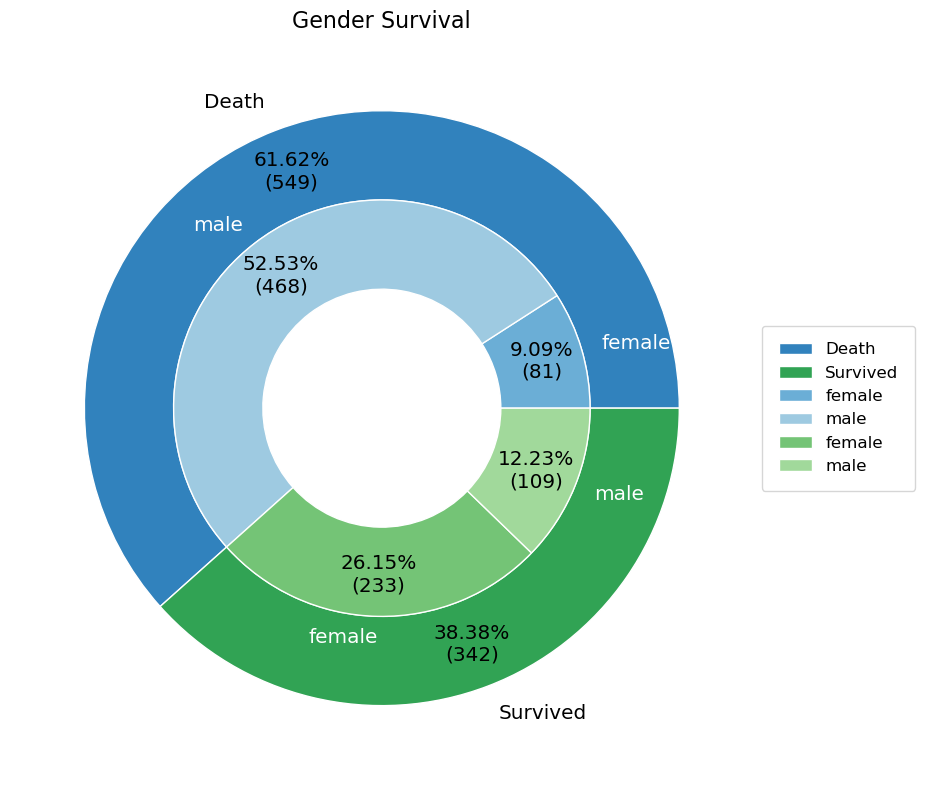

In [13]:
outer = df.groupby('Survived').count().reset_index()
inner = df.groupby(['Survived', 'Sex']).count()

fig, ax = plt.subplots(figsize=(20,8))
size = 0.3

color = plt.get_cmap("tab20c") 
outer_colors = color(np.arange(2)*8)
inner_colors = color([1, 2, 9, 10])

patches, texts, autotexts = ax.pie(outer['PassengerId'], radius=1,
                                   labels = outer['Survived'].replace({0: 'Death', 1: 'Survived'}),
                                   colors = outer_colors,
                                   autopct= lambda p: '{:.2f}%\n({:.0f})'.format(p,(p/100) * outer['PassengerId'].sum()),
                                   textprops={'size': 'x-large'}, 
                                   pctdistance=0.85,
                                   wedgeprops=dict(width=size, edgecolor='w'))

patches, texts, autotexts = ax.pie(inner['PassengerId'], radius=1-size, 
                                   labels= inner.index.get_level_values(1),
                                   colors = inner_colors,
                                   autopct= lambda p: '{:.2f}%\n({:.0f})'.format(p,(p/100) * inner['PassengerId'].sum()), 
                                   textprops={'size': 'x-large'},
                                   pctdistance=0.8,
                                   wedgeprops=dict(width=size, edgecolor='w'))
[text.set_color('white') for text in texts]

plt.legend(loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), borderpad=1, fontsize=12)
plt.title('Gender Survival',fontsize=16)
plt.tight_layout()
plt.show()

<a name='question3'></a>
## **3. Pairplot**

Plot pairwise relationships in a dataset.

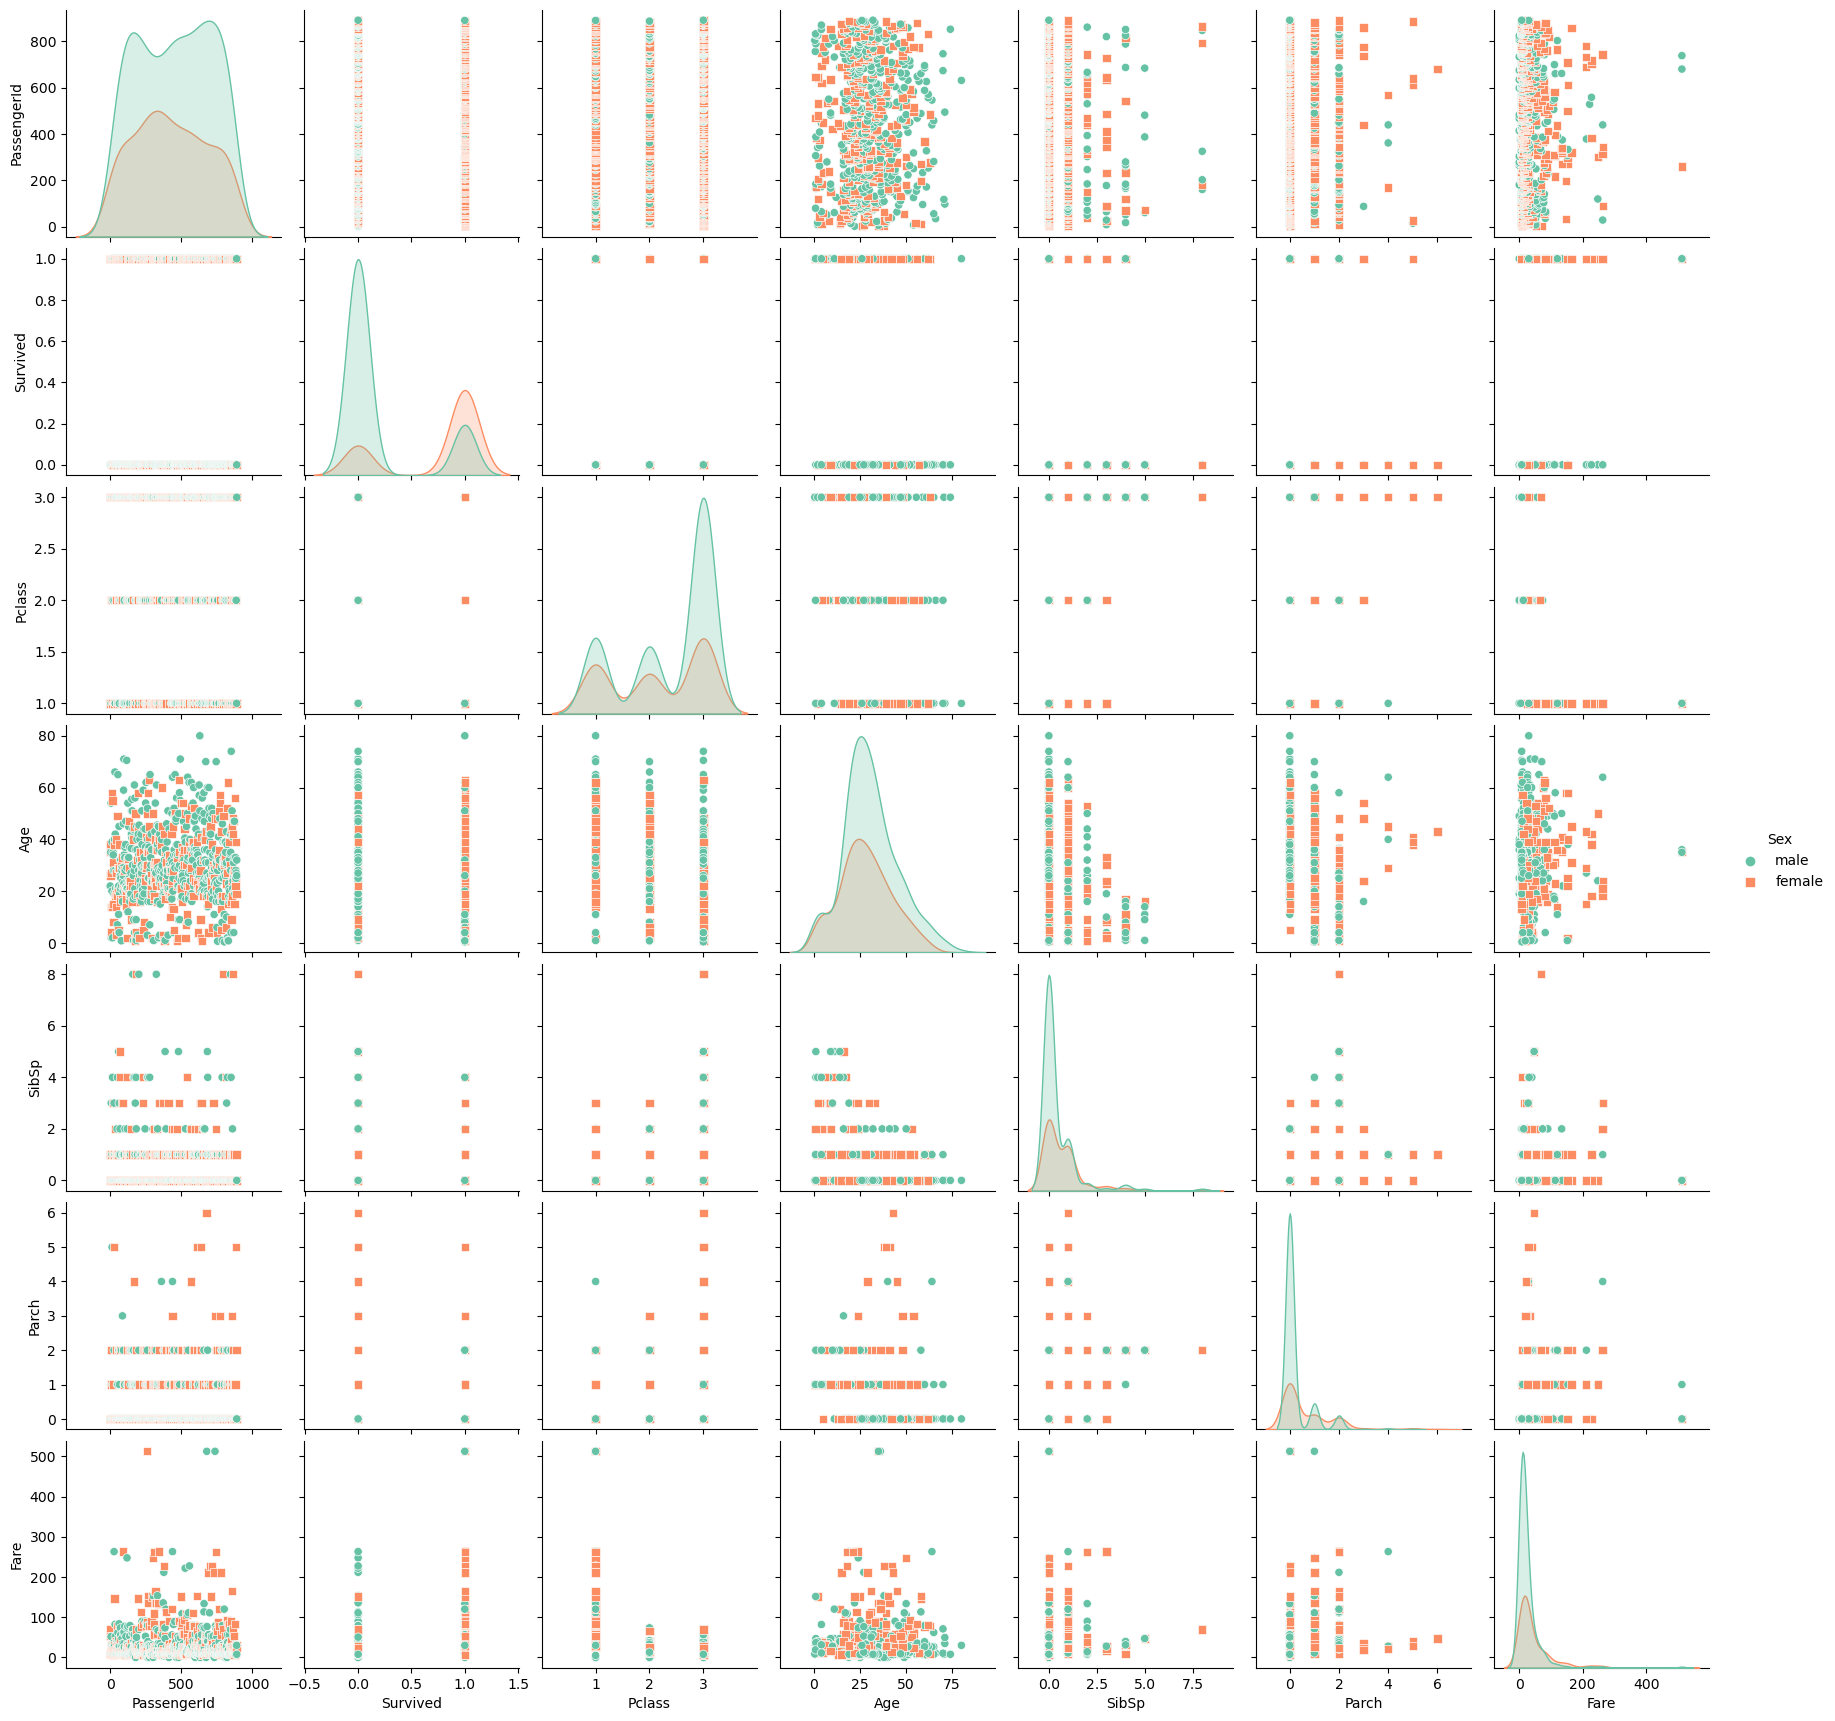

In [14]:
sns.pairplot(df, hue='Sex',markers=["o", "s"], palette="Set2");

<a name='question4'></a>
## **4. Embarked**

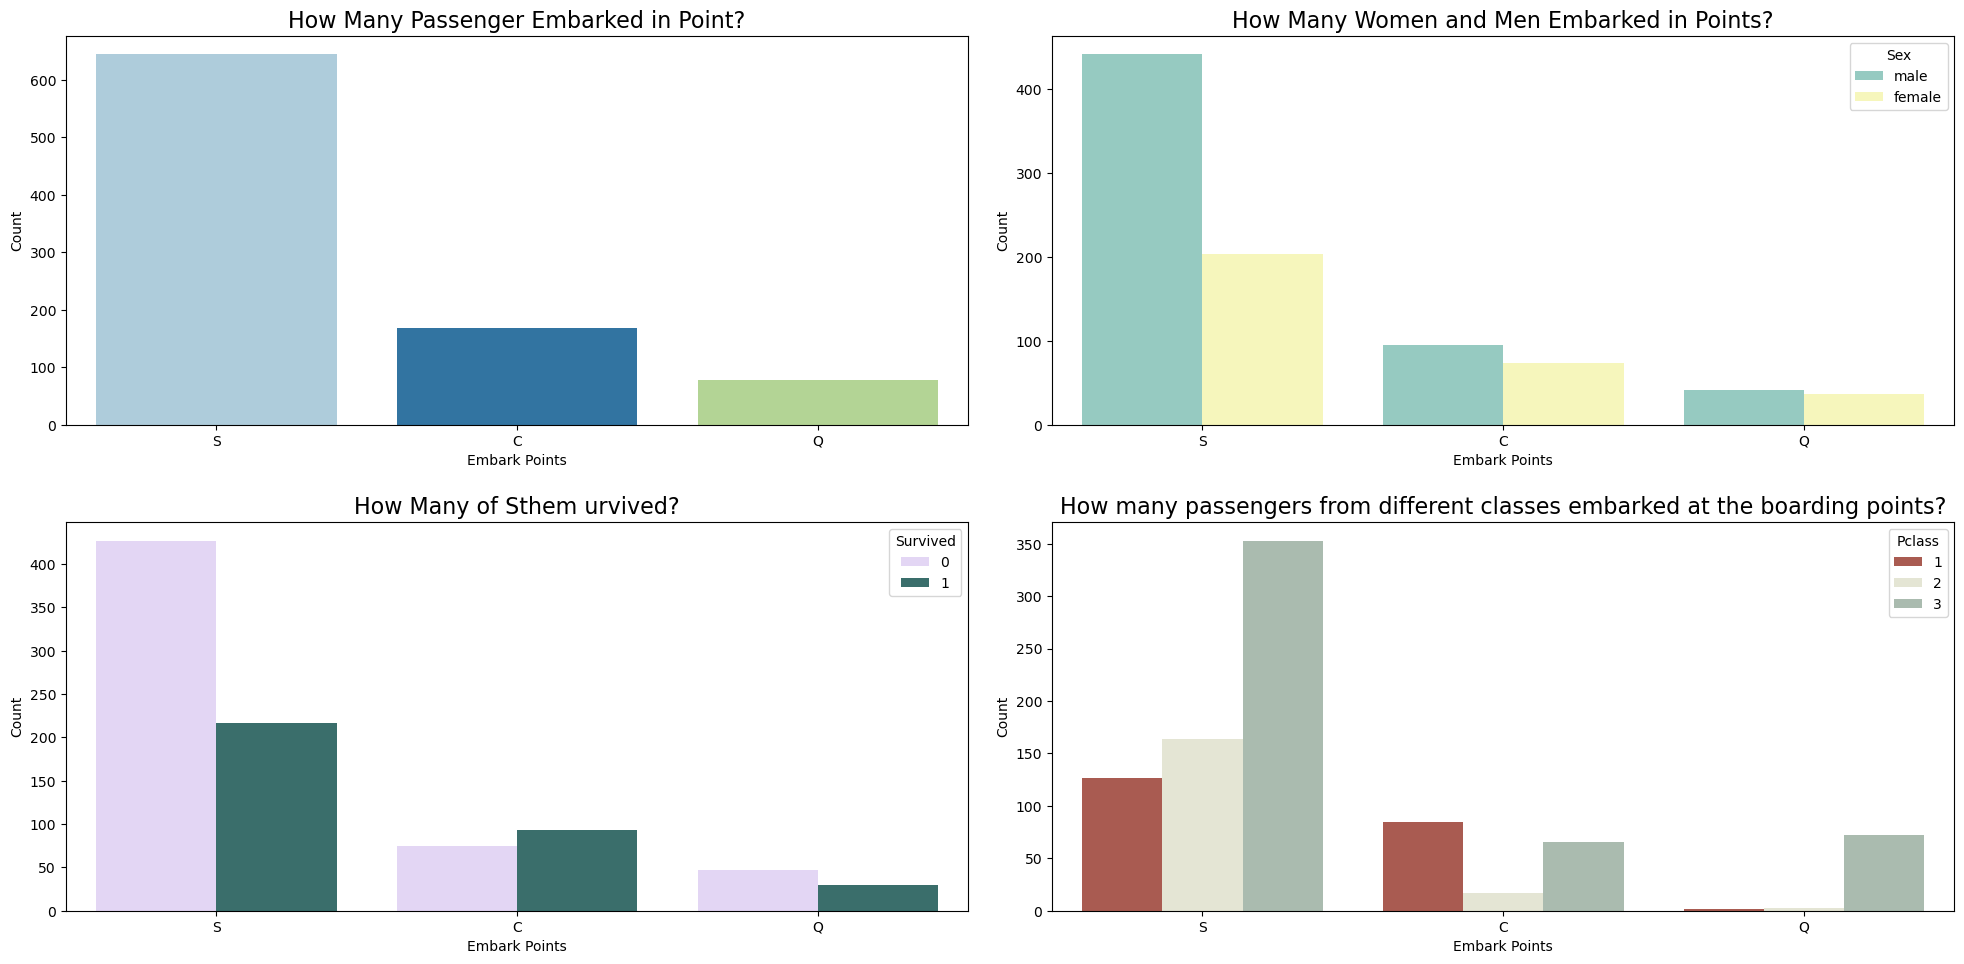

In [15]:
fig, axs = plt.subplots(2,2, figsize = (20, 10))

ax1 = sns.countplot(x = 'Embarked', data = df, hue= None,  ax = axs[0][0], palette="Paired");
ax1.set_xlabel("Embark Points")
ax1.set_ylabel("Count")
axs[0][0].set_title('How Many Passenger Embarked in Point?', fontsize=16);

ax2 = sns.countplot(x = 'Embarked', data = df,hue = 'Sex', ax = axs[0][1], palette="Set3");
ax2.set_xlabel("Embark Points")
ax2.set_ylabel("Count")
axs[0][1].set_title('How Many Women and Men Embarked in Points?', fontsize=16);

ax3 = sns.countplot(x = 'Embarked', data = df,hue = 'Survived', ax = axs[1][0], palette=["#E2D1F9", "#317773"]);
ax3.set_xlabel("Embark Points")
ax3.set_ylabel("Count")
axs[1][0].set_title('How Many of Sthem urvived?',  fontsize=16);

ax4 = sns.countplot(x = 'Embarked', data = df,hue = 'Pclass', ax = axs[1][1], palette = ["#B85042", "#E7E8D1", "#A7BEAE"]);
ax4.set_xlabel("Embark Points")
ax4.set_ylabel("Count")
axs[1][1].set_title('How many passengers from different classes embarked at the boarding points?', fontsize=16);

plt.tight_layout(pad=2)
plt.show()

<a name='question5'></a>
## **5. Survived**

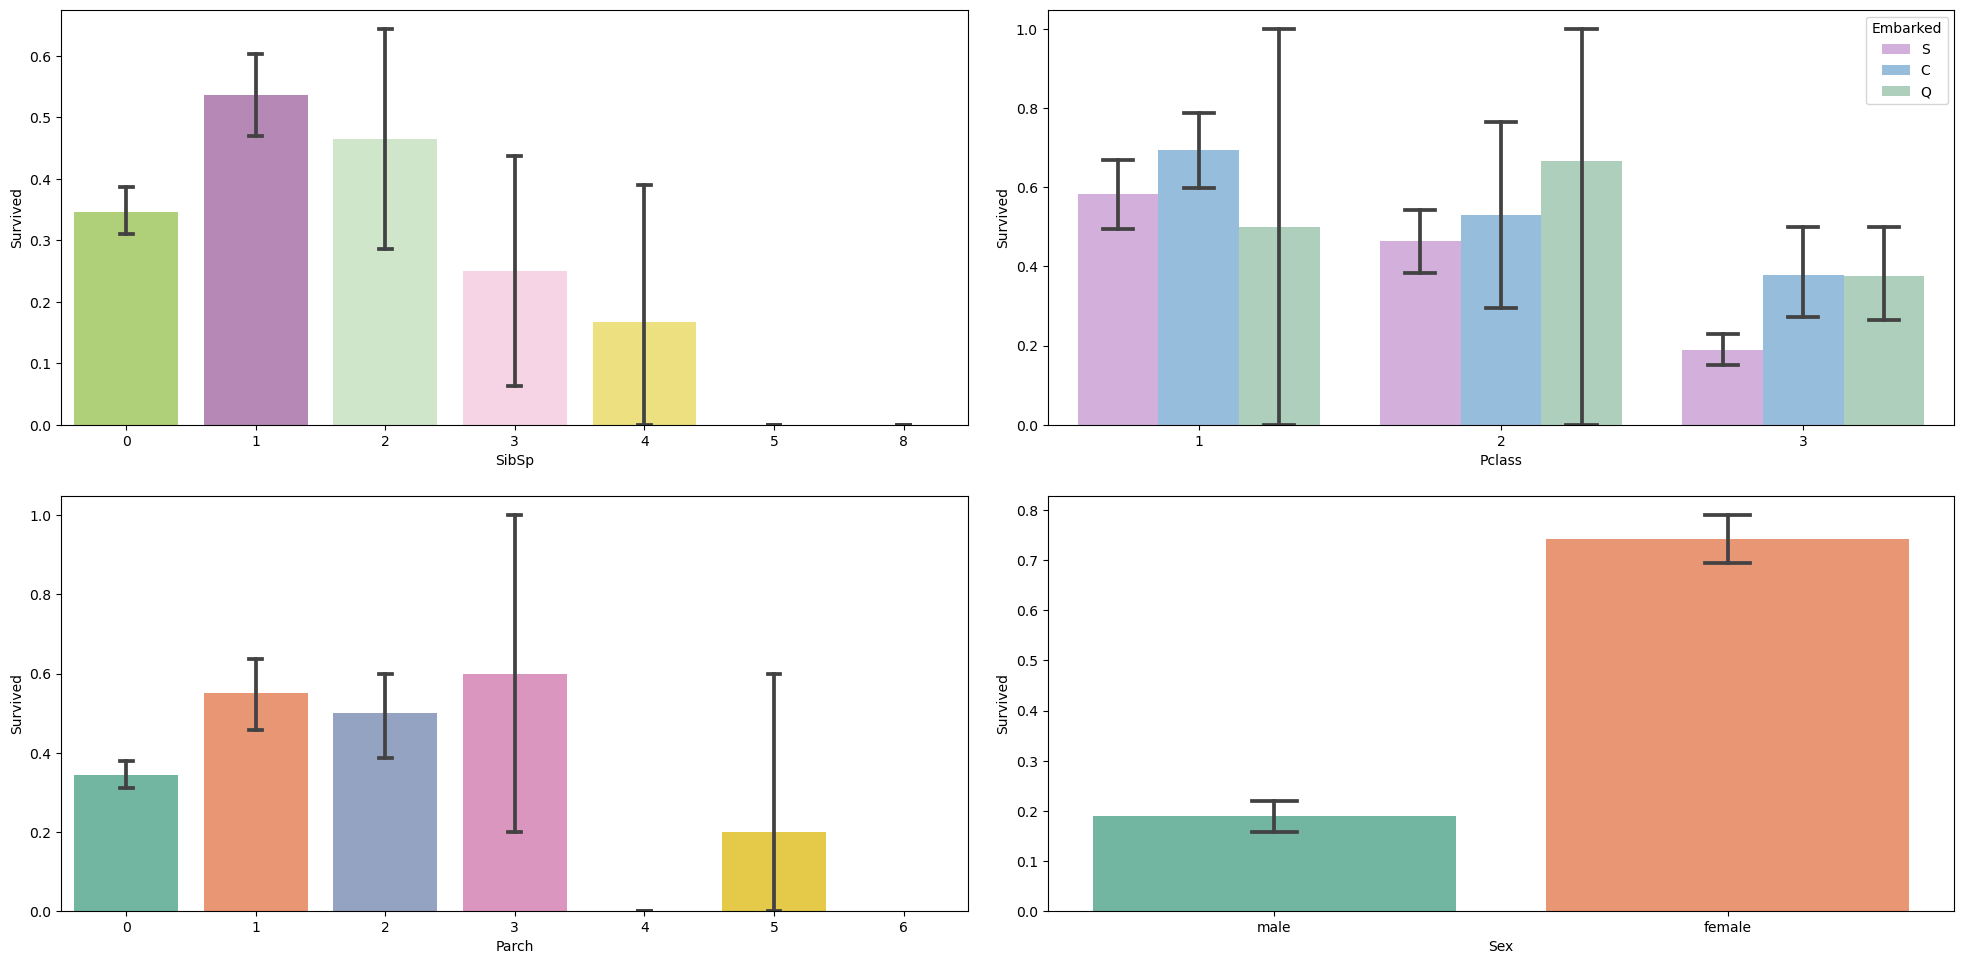

In [16]:
fig, axs = plt.subplots(2,2, figsize = (20, 10))

palette_set3 = sns.color_palette("Set3")
palette = sns.color_palette([palette_set3[6], palette_set3[9], palette_set3[10], palette_set3[7], palette_set3[11]])
ax1 = sns.barplot(x= 'SibSp', y = 'Survived', data=df, 
                  capsize=0.1, palette=palette, ax = axs[0][0]);

ax2 = sns.barplot(x='Pclass', y= 'Survived', 
            hue = 'Embarked', data = df, 
            capsize=0.1, 
            palette=["#D7A9E3FF", "#8BBEE8FF", "#A8D5BAFF"],
            ax = axs[0][1]);

ax3 = sns.barplot(x= 'Parch', y = 'Survived', data=df, 
                  capsize=0.1, palette='Set2', ax = axs[1][0]);

ax4 = sns.barplot(x= 'Sex', y = 'Survived', data=df, 
                  capsize=0.1, palette='Set2', ax = axs[1][1]);

plt.tight_layout(pad=2)
plt.show()

<a name='question6'></a>
## **6. Correlation Matrix**

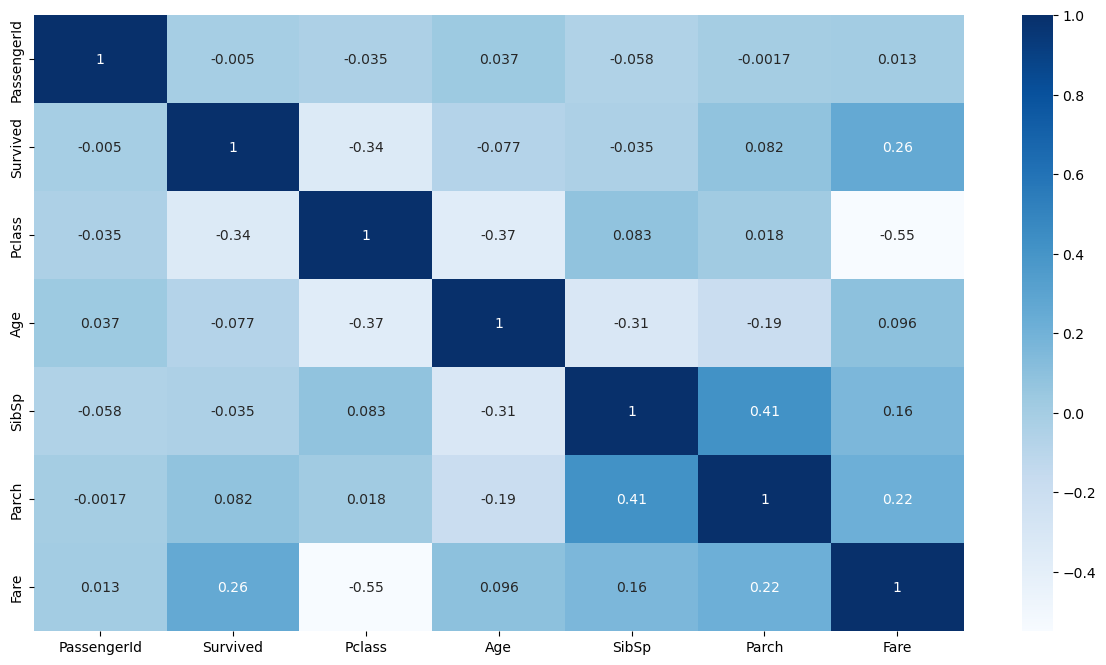

In [17]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), cmap="Blues", annot=True);

<a name='question7'></a>
## **7. Age Distribution**

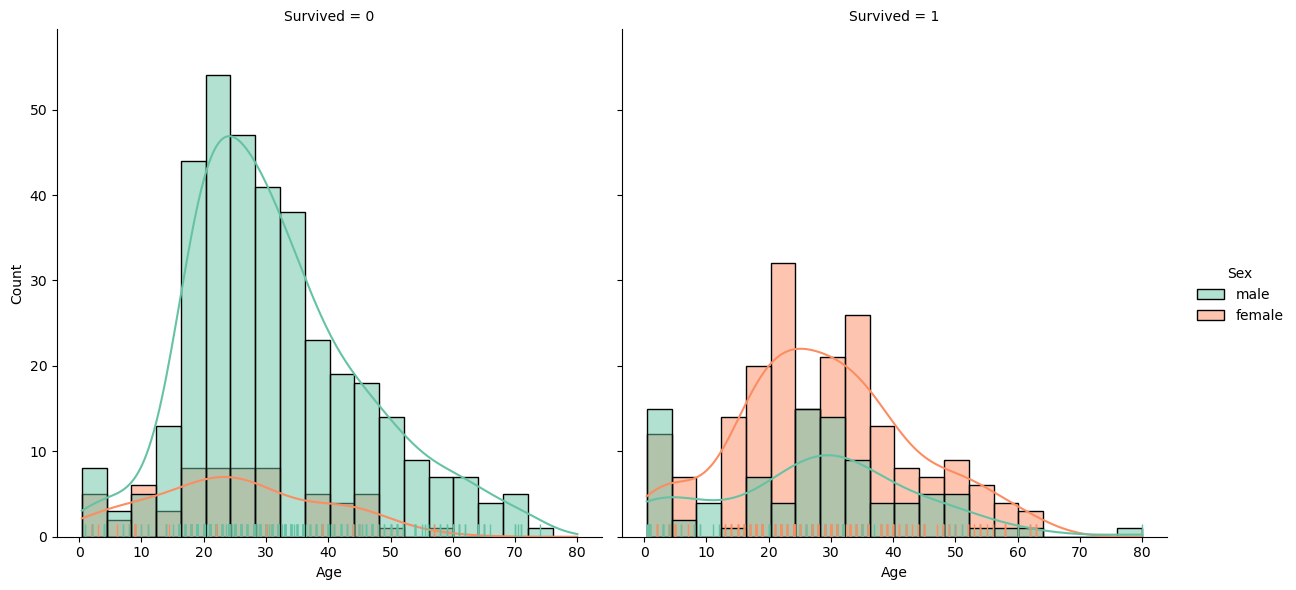

In [18]:
sns.displot(data=df, x="Age",hue='Sex', col='Survived', palette='Set2', kde=True, rug=True, height=6, aspect=1);

<a name='question8'></a>
## **8. Outlier**

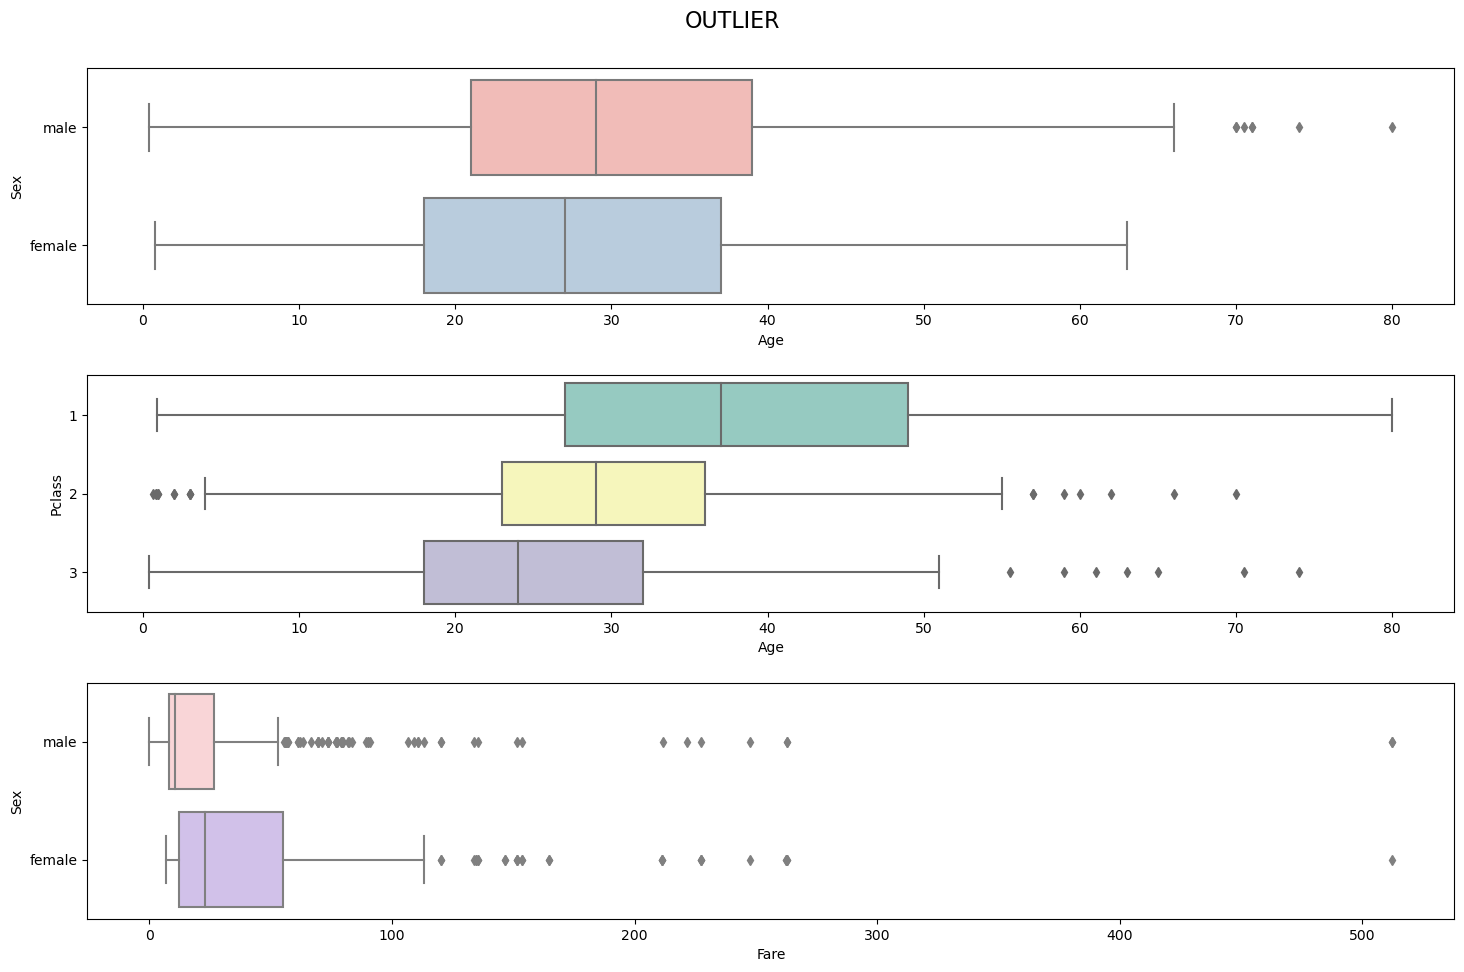

In [19]:
fig, axs = plt.subplots(3,1, figsize = (15, 10))

sns.boxplot(data=df, x = "Age", y = "Sex", ax=axs[0], palette= "Pastel1")
sns.boxplot(data=df, x = "Age" , y='Pclass', orient='h', ax=axs[1], palette="Set3")
sns.boxplot(data=df, x = "Fare", y = "Sex", ax=axs[2], palette= ["#ffcfd2","#cfbaf0"])

fig.suptitle("OUTLIER", fontsize=16)
plt.tight_layout(pad=2)
plt.show()

<a name='question9'></a>
## **9. Title**

In [20]:
df['Title'] = [i.split(".")[0].split(",")[1] for i in df['Name']]

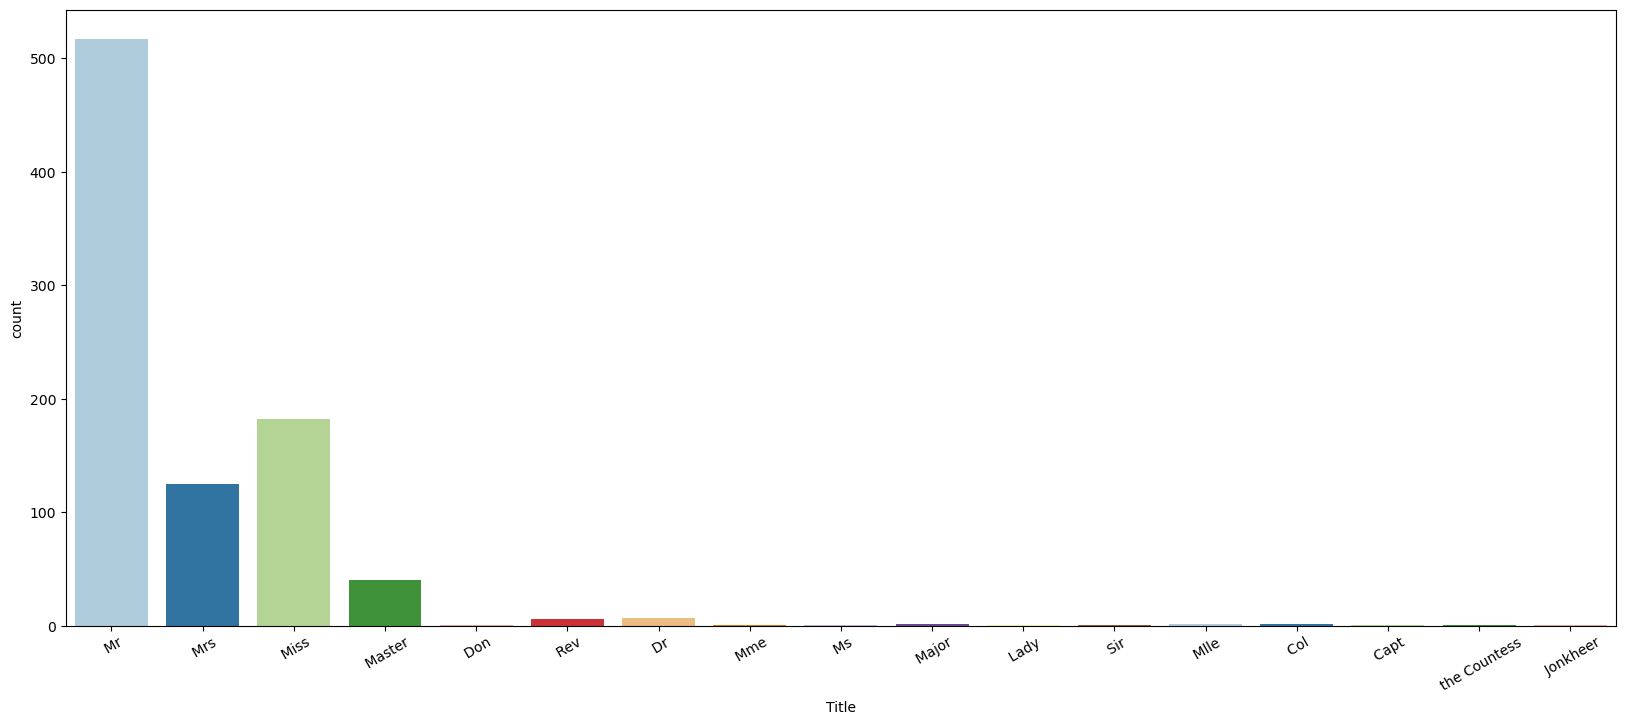

In [21]:
plt.figure(figsize=(20, 8))
sns.countplot(x = df['Title'], data = df, palette = 'Paired');
plt.xticks(rotation = 30);

<a name='question10'></a>
## **10. Ages & Life Stages**

In [22]:
df['LifeStage'] = 'NaN'
df.loc[df['Age'] <= 1, 'LifeStage'] = 'Infant' 
df.loc[(2 <= df['Age']) & (df['Age'] <= 4), 'LifeStage'] = 'Todler' 
df.loc[(5 <= df['Age']) & (df['Age'] <= 12), 'LifeStage'] = 'Child' 
df.loc[(13 <= df['Age']) & (df['Age'] <= 19), 'LifeStage'] = 'Teen'
df.loc[(20 <= df['Age']) & (df['Age'] <= 39), 'LifeStage'] = 'Adult'  
df.loc[(40 <= df['Age']) & (df['Age'] <= 59), 'LifeStage'] = 'Middle Age Adult' 
df.loc[df['Age'] >= 60, 'LifeStage'] = 'Senior Adult'

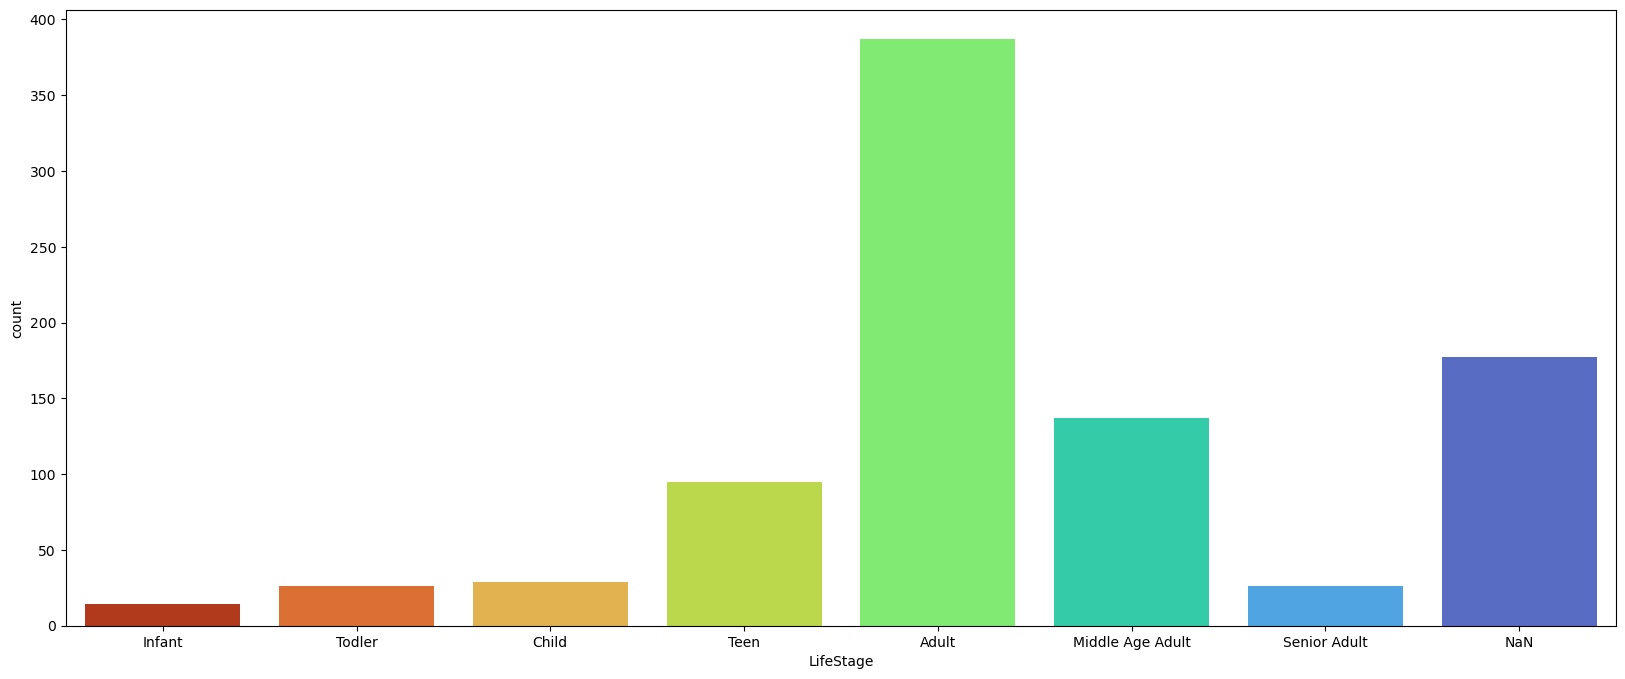

In [23]:
plt.figure(figsize=(20, 8))
sns.countplot(x='LifeStage', data = df, palette = 'turbo_r',
              order = ['Infant', 'Todler', 'Child', 'Teen', 'Adult', 
                       'Middle Age Adult', 'Senior Adult', 'NaN']);